Dataset: World Happiness Report 2019

In [1]:
import pandas as pd

df = pd.read_csv("2019.csv", sep=",")
df = pd.DataFrame(df)
df.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


### Linear Regression: 행복지수와 GDP 관계

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

gdp = df["GDP per capita"].values.tolist()
gdp = np.array(gdp).reshape(-1, 1)

score = df["Score"].values.tolist()
score = np.array(score)

model.fit(gdp, score)

print(f"weight: {model.coef_[0]}, bias: {model.intercept_}")
print(f"Score = {model.coef_[0]:.3f} * GDP + {model.intercept_:.3f}")

weight: 2.2181480010083567, bias: 3.399345178292417
Score = 2.218 * GDP + 3.399


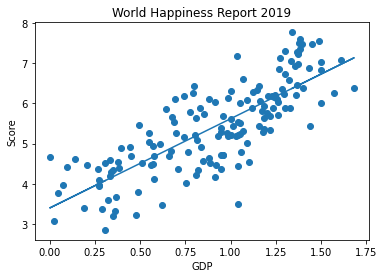

In [3]:
import matplotlib.pyplot as plt

plt.title("World Happiness Report 2019")
plt.xlabel("GDP")
plt.ylabel("Score")
plt.scatter(gdp, score)
plt.plot(gdp, model.coef_ * gdp + model.intercept_)

In [4]:
gdp_pred = [0.5, 1.0, 1.5, 2.0]
gdp_pred = np.array(gdp_pred).reshape(-1, 1)
score_pred = model.predict(gdp_pred)

print("GDP\t Score")
print("-" * 15)
for i in range(len(score_pred)):
    print(f"{gdp_pred[i][0]}\t {score_pred[i]:.3f}")

GDP	 Score
---------------
0.5	 4.508
1.0	 5.617
1.5	 6.727
2.0	 7.836
